In [1]:
Probability -- measure of how likelihood an event will occur
P = desired outcomes / total outcomes

Conditional Probability
P(A,B) --> Prob of A and B both occuring
P(A|B) --> Prob of A given that B has occured

P(A|B) = P(A,B) / P(B)

Example: Two tests taken for students of a class
    60% students passed both
    80% passed second test
A --> passing first test
B --> passing second test

P(A|B) = 0.6/0.8 = 0.75
75% students who passed first test also passed second

# Bayes Theorem
P(A|B) = P(A) x P(B|A) / P(B)

In [2]:
0.6/0.8

0.7499999999999999

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [13]:
ad = pd.read_csv('/home/gbhure/Data/Social_Network_Ads.csv')

In [14]:
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
X = ad.iloc[:, 2:4].values
y = ad.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ganesh.bhure1@gmail.com


In [ ]:
# Time Series Analysis

If we have only one variable and we want to predict in according to time
Values are recorded at constant interval of time.. seconds, minutes, days, months

forecast future behaviour
trends in future
sales forecasting
compare with competitors
weather forecasting

Simple Average
Moving Average (MA)
Auto Regressive (AR)
ARMA
ARIMA (AR integrated MA)


In [32]:
sales = pd.read_csv('/home/gbhure/Data/ts-sales-cars.csv')
female = pd.read_csv('/home/gbhure/Data/daily-total-female-births-CA.csv')

In [33]:
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [34]:
len(sales)

36

In [35]:
type(sales.Month[0])

str

In [36]:
t1 = '2020-05'

In [37]:
t2 = pd.datetime.strptime(t1, '%Y-%m')

In [38]:
type(t2)

datetime.datetime

In [39]:
t2

datetime.datetime(2020, 5, 1, 0, 0)

In [43]:
#def func(x):
#    return pd.datetime.strptime(x, '%Y-%m')
#sales = pd.read_csv('/home/gbhure/Data/ts-sales-cars.csv', parse_dates=[0], date_parser=func)

sales = pd.read_csv('/home/gbhure/Data/ts-sales-cars.csv', parse_dates=[0], \
                    date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m'))

In [41]:
sales.head()

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [42]:
type(sales.Month[0])

pandas._libs.tslibs.timestamps.Timestamp

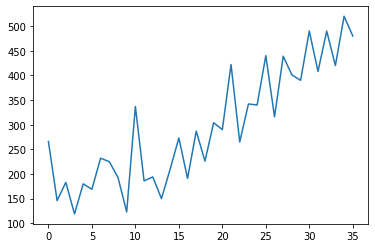

In [46]:
plt.plot(sales.Sales)

In [49]:
# sales.Sales.plot()

In [51]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

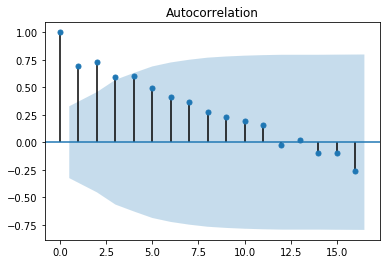

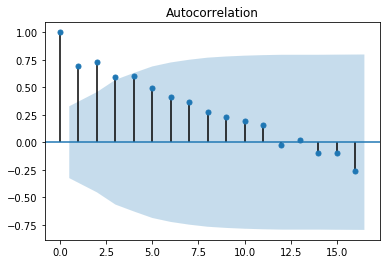

In [53]:
plot_acf(sales.Sales)

In [60]:
sales_diff = sales.diff(periods=1)
sales_diff.head()

,Month,Sales
0,NaT,NaN
1,31 days,-120.0
2,29 days,37.0
3,31 days,-64.0
4,30 days,61.0


In [61]:
sales_diff[1:].head()

,Month,Sales
1,31 days,-120.0
2,29 days,37.0
3,31 days,-64.0
4,30 days,61.0
5,31 days,-11.0


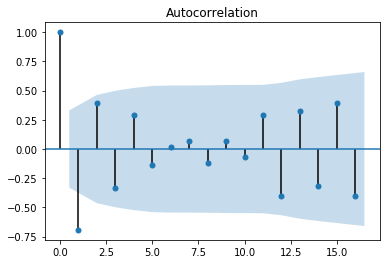

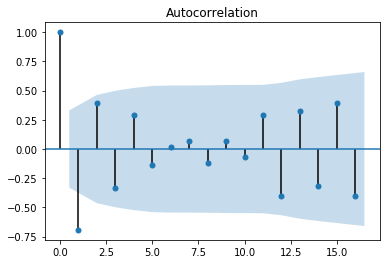

In [63]:
plot_acf(sales_diff.Sales[1:])

In [64]:
X = sales.Sales.values

In [65]:
X

array([266, 146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194,
       150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340, 440,
       316, 439, 401, 390, 490, 408, 490, 420, 520, 480])

In [67]:
len(X)

36

In [75]:
36*0.75

27.0

In [76]:
X_train = X[:27]
X_test = X[27:]

In [77]:
len(X_test)

9

In [78]:
len(X_train)

27

In [82]:
ar_model = AR(X_train).fit()

In [83]:
ar_model = AR(X_train)
ar_model_fit = ar_model.fit()

In [85]:
pred = ar_model_fit.predict(start=27, end=36)

In [86]:
pred

array([398.22922886, 368.27242294, 429.47485941, 379.17750391,
       431.35262347, 399.90234723, 433.3589338 , 418.74469463,
       453.45711544, 429.65174489])

In [87]:
X_test

array([439, 401, 390, 490, 408, 490, 420, 520, 480])

In [ ]:
ARIMA
AR (p) -- current value is correlated with the previous value
Yt = f(Yt-1, Yt-2, ..)
p=1 --> previous 1 month value
p=2 --> prev 2 months data to predict current month

Integrated (d) -- 
d = 1 --> difference between current and previous 
d = 2 --> current and second previous -- level2 correlation

MA(q) -- smoothing -- by removing noise
periods in moving average model
taking specific value count e.g. 5days avg -- start from n and take first 5

model = ARIMA(data, order=(2, 1, 1))

In [88]:
arima = ARIMA(X_train, order=(3,1,1))
arima_fit = arima.fit()
pred = arima_fit.predict(start=27, end=36)

In [89]:
pred

array([ 72.10765819, -26.22135809,  69.65974573, -53.63684635,
        40.80427158, -19.87312471,  43.50709019, -22.15103515,
        26.8897435 , -10.75349807])

In [90]:
from random import random
data = [x + random() for x in range(1, 100)]

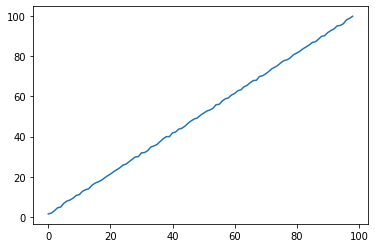

In [99]:
plt.plot(data)

In [100]:
data[95:]

[96.0795650370099, 97.9754278319088, 98.7885107436368, 99.80208603041011]

In [98]:
model = ARIMA(data, order=(2, 1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[100.42564458]


In [101]:
f_births = pd.read_csv('/home/gbhure/Data/daily-total-female-births-CA.csv', \
                       index_col=[0], parse_dates=[0])
series_values = f_births.values

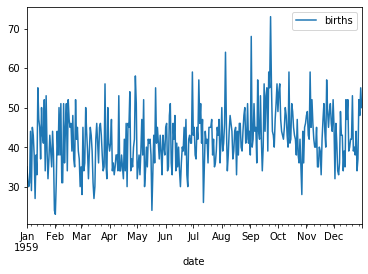

In [102]:
f_births.plot()

In [103]:
# MA -- 20 values moving -- 20days avg --- or 30day moving avg etc. Fluctuations removed using MA. 
# Stocks use MA to remove noice/fluctuations
f_births_mean = f_births.rolling(window=20).mean()

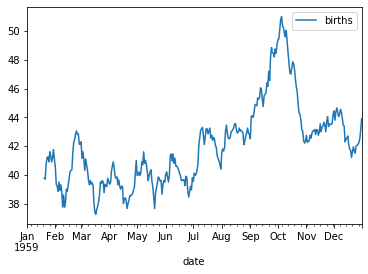

In [104]:
f_births_mean.plot()

In [105]:
val = pd.DataFrame(series_values)

In [106]:
# baseline model. Next day prediction is prev val
birth_df = pd.concat([val, val.shift(1)], axis=1)

In [107]:
birth_df.columns = ['actual_birth', 'forecast_birth']
# remove first row (nan)
birth_test = birth_df[1:]

In [108]:
from sklearn.metrics import mean_squared_error
import numpy as np
birth_err = mean_squared_error(birth_test.actual_birth, birth_test.forecast_birth)

In [109]:
np.sqrt(birth_err)

9.177283229394606

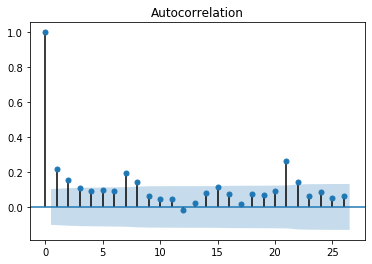

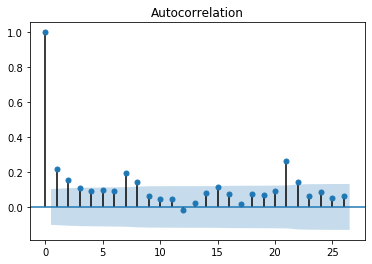

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf to identify parameter q
plot_acf(f_births) # d=1, 2, 3 -- correlated.. 4 is in critical limit.


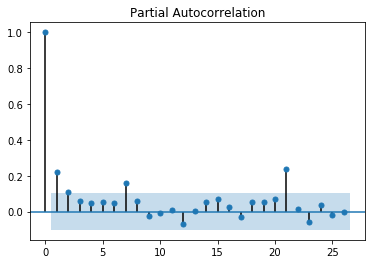

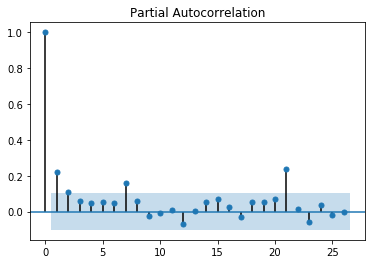

In [111]:
plot_pacf(f_births)  # to identify value of p

In [112]:
birth_train = f_births[:330]
birth_test = f_births[330:]

In [113]:
from statsmodels.tsa.arima_model import ARIMA
birth_model = ARIMA(birth_train, order=(3,1,3))
birth_model_fit = birth_model.fit()
birth_model_fit.aic  # lower is better.. check different order values

/home/gbhure/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2225.7916154009868

In [114]:
birth_forecast = birth_model_fit.forecast(steps=35)[0]

In [115]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))  # it was 9.177 using baseline forecast. 
# Now err reduced to 6.71.. doing better.

6.725269728161546

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
#pdq

